In [1]:
#import all the modeules we've used before

import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import rdkit
# Render the figure in a notebook:
%matplotlib inline  

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score

In [2]:
df = pd.read_csv('tox21.csv')
df

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX2725,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...
7827,1.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,TOX2370,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
7828,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX2371,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
7829,1.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,TOX2377,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...


In [3]:
#molecules with a 1.0 are toxic in this assay.
df.sum()
#This is the number of toxic compounds for each assay: 

NR-AR                                                        309.0
NR-AR-LBD                                                    237.0
NR-AhR                                                       768.0
NR-Aromatase                                                 300.0
NR-ER                                                        793.0
NR-ER-LBD                                                    350.0
NR-PPAR-gamma                                                186.0
SR-ARE                                                       942.0
SR-ATAD5                                                     264.0
SR-HSE                                                       372.0
SR-MMP                                                       918.0
SR-p53                                                       423.0
mol_id           TOX3021TOX3020TOX3024TOX3027TOX20800TOX5110TOX...
smiles           CCOc1ccc2nc(S(N)(=O)=O)sc2c1CCN1C(=O)NC(c2cccc...
dtype: object

In [4]:
#perhaps, we can sum the values for each compound. i.e. if a compound is toxic in two compounds, we somehow need to assign a compound toxicity score! 
df.isna().sum() #How do we deal with NaNs? This is the number of NaNs in each column! Treat it as zero and flag the compounds as Nan-containing.

NR-AR             566
NR-AR-LBD        1073
NR-AhR           1282
NR-Aromatase     2010
NR-ER            1638
NR-ER-LBD         876
NR-PPAR-gamma    1381
SR-ARE           1999
SR-ATAD5          759
SR-HSE           1364
SR-MMP           2021
SR-p53           1057
mol_id              0
smiles              0
dtype: int64

In [5]:
#make two toxicity scores based on NR and SR assay response.
df['NR_tox_score'] = df['NR-AR']+df['NR-AR-LBD']+df['NR-AhR']+df['NR-Aromatase']+df['NR-ER']+df['NR-ER-LBD']+df['NR-PPAR-gamma']
df['SR_tox_score'] = df['SR-ARE']+df['SR-ATAD5']+df['SR-HSE']+df['SR-MMP']+df['SR-p53']

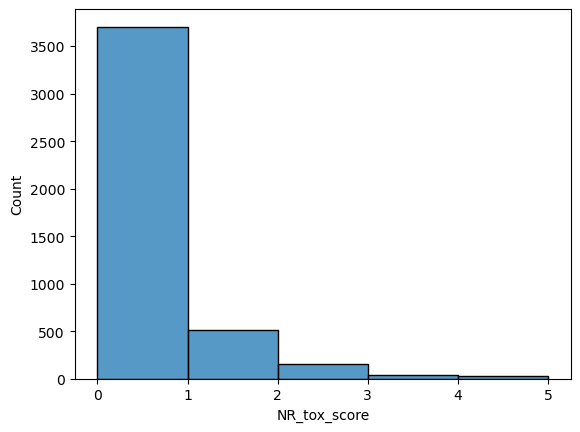

<Axes: xlabel='SR_tox_score', ylabel='Count'>

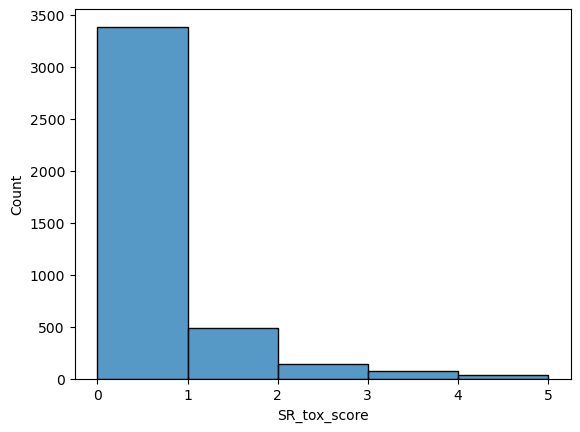

In [6]:
sns.histplot(data=df,x='NR_tox_score',bins=5)
plt.show()
sns.histplot(data=df,x='SR_tox_score',bins=5)


In [7]:
df_no_nan = df.dropna()
df_no_nan.sum()
df_no_nan

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles,NR_tox_score,SR_tox_score
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX6619,O=S(=O)(Cl)c1ccccc1,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX6612,CC(C)COC(=O)C(C)C,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX6615,C=C(C)C(=O)OCCOC(=O)C(=C)C,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,TOX14833,O=C([O-])Cc1cccc2ccccc12,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7809,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX569,CCC1CO1,1.0,0.0
7810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX562,FC(F)OC(F)(F)C(F)Cl,0.0,0.0
7814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX566,ClCC1CO1,0.0,0.0
7818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX25188,c1cnc(N2CCN(Cc3ccc4c(c3)OCO4)CC2)nc1,0.0,0.0


In [8]:
df.sum()

NR-AR                                                        309.0
NR-AR-LBD                                                    237.0
NR-AhR                                                       768.0
NR-Aromatase                                                 300.0
NR-ER                                                        793.0
NR-ER-LBD                                                    350.0
NR-PPAR-gamma                                                186.0
SR-ARE                                                       942.0
SR-ATAD5                                                     264.0
SR-HSE                                                       372.0
SR-MMP                                                       918.0
SR-p53                                                       423.0
mol_id           TOX3021TOX3020TOX3024TOX3027TOX20800TOX5110TOX...
smiles           CCOc1ccc2nc(S(N)(=O)=O)sc2c1CCN1C(=O)NC(c2cccc...
NR_tox_score                                                10

In [9]:
# def row_has_nan(df_only_data, row):
#     hasnan = False
#     istoxic = False
#     for i in df_only_data.iloc[row]: #select each row
#         print(i,type(i))
#         if i != 0:
#             if i != 0:
#                 hasnan = True
#         if i == 1.0:
#             istoxic = True
#     print(hasnan,istoxic)

In [10]:
df_only_data = df.drop(columns=['mol_id', 'smiles','NR_tox_score','SR_tox_score']) #drop the columns.

toxicnans = [] #compounds that are toxic, and contain a nan value, containing the index
nontoxicnans = [] # compounds that aren't toxic, and contain a nan value.
nonans = [] #compounds w/ no nans, toxic or not toxic

for row in df_only_data.index: #select each row
    hasnan = False
    istoxic = False
    for i in df_only_data.iloc[row]: #select each row
        # print(i,type(i))
        if i != 0:
            if i != 1:
                hasnan = True
        if i == 1.0:
            istoxic = True
            
    if hasnan == True and istoxic == True:
        toxicnans.append(row)
    elif hasnan == True and istoxic == False:
        nontoxicnans.append(row)
    elif hasnan == False:
        nonans.append(row)

In [11]:
len(toxicnans)

2196

In [12]:
len(nontoxicnans)

2556

In [13]:
len(nonans)

3079

we will get rid of the nontoxicnans, because they may be hiding toxicity under their Nan. We will the toxicnans, because we know they're toxic.

In [14]:
df['smiles']

0                            CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1                               CCN1C(=O)NC(c2ccccc2)C1=O
2       CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3                         CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4                               CC(O)(P(=O)(O)O)P(=O)(O)O
                              ...                        
7826    CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...
7827    CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
7828    C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
7829    C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...
7830              COc1ccc2c(c1OC)CN1CCc3cc4c(cc3C1C2)OCO4
Name: smiles, Length: 7831, dtype: object

In [15]:
#make fingerprints, from 6_ML_Deeplearning
### Turn off a warning
df_dropped_Al = df.drop([1322, 2290,2297,3558, 4565,4649, 5538, 6723, 7830]) #we dropped these values, they're no longer there
from rdkit import RDLogger 
RDLogger.DisableLog('rdApp.*') 
# df = df.drop(df.iloc[1322])
fp_list = []
for smiles in df_dropped_Al['smiles']:
    mol = Chem.MolFromSmiles(smiles)
    fpgen = AllChem.GetMorganGenerator(radius=2)
    # print(smiles)
    fp = fpgen.GetFingerprintAsNumPy(mol)
    fp_list.append(fp)

In [16]:
Y_raw = pd.DataFrame(df_dropped_Al['NR_tox_score'],df_dropped_Al['SR_tox_score']) #combine the tox scores for NR and SR into a Y_raw dataframe
X_morgan_raw = pd.DataFrame(fp_list) #put the morgan fingerprint into a new dataframe

In [17]:
#copied from stack overflow! https://stackoverflow.com/questions/38250710/how-to-split-data-into-3-sets-train-validation-and-test
x, x_test, y, y_test = train_test_split(X_morgan_raw, Y_raw,test_size=0.2,train_size=0.8) #split the test off first
X_morgan_train, X_morgan_val, y_train, y_val = train_test_split(x,y,test_size = 0.25,train_size =0.75) #then split this again.

#morgan fingerprint test/train/split!

In [18]:
# https://greglandrum.github.io/rdkit-blog/posts/2022-12-23-descriptor-tutorial.html
from rdkit.Chem import Descriptors
def getMolDescriptors(mol, missingVal=None):
    ''' calculate the full list of descriptors for a molecule
    
        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    for nm,fn in Descriptors._descList:
        # some of the descriptor fucntions can throw errors if they fail, catch those here:
        try:
            val = fn(mol)
        except:
            # print the error message:
            import traceback
            traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal
        res[nm] = val
    return res

# Time to look at correlations with descriptors!

<Axes: >

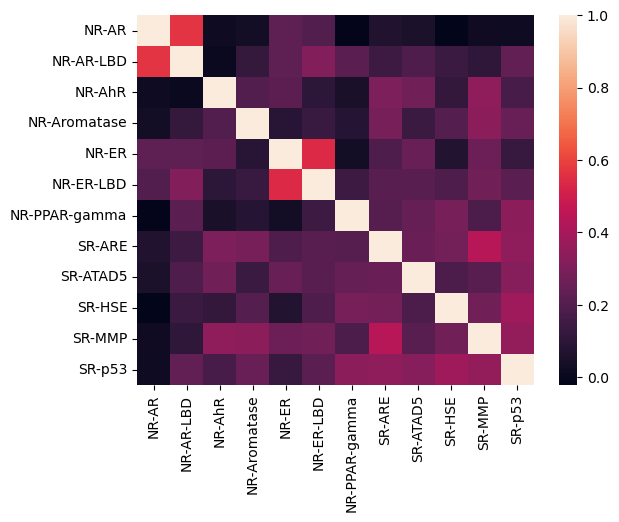

In [19]:
corr = df_only_data.corr()
sns.heatmap(corr)
#the different receptors are not particularly correlated. This is good.
#however, NR is not correlated with other NRs. Does the split into two NR/SR toxicity score make sense?